In [ ]:
#04/06/25
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

#datos
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 3.5, 4, 5, 6.5])

#crear y entrenar la red neuronal
modelo = MLPRegressor(hidden_layer_sizes=(10,), activation = 'relu', max_iter=1000, random_state=1)
modelo.fit(X,y)

MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=1)

In [ ]:
#05/06/25
#prediccion para las 6 horas de estudio
prediccion = modelo.predict([[6]])
print(f'La prediccion para 6 horas: {prediccion[0]:.2f}')

La prediccion para 6 horas: 7.01


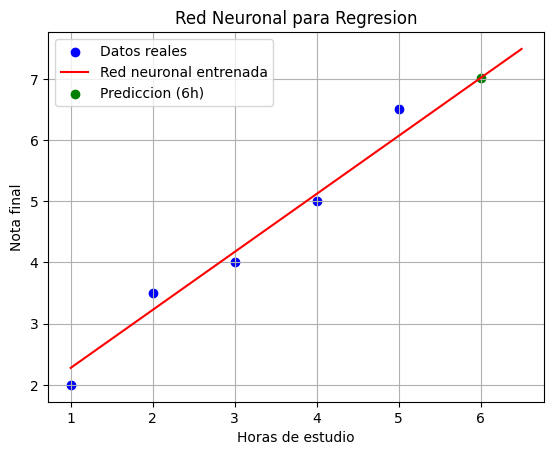

In [ ]:
#visualizar
X_rango = np.linspace(1, 6.5, 100).reshape(-1, 1)
y_rango = modelo.predict(X_rango)
plt.scatter(X,y, color='blue', label='Datos reales')
plt.plot(X_rango, y_rango, color='red', label='Red neuronal entrenada')
plt.scatter(6, prediccion, color='green', label='Prediccion (6h)')

plt.xlabel('Horas de estudio')
plt.ylabel('Nota final')
plt.title('Red Neuronal para Regresion')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#06/06/25
#EJEMPLO 02
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

#datos
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([0, 0, 0, 1, 1, 1]) #0 = no aprueba ,#1 = si aprueba

In [ ]:
#crear y entrenar (clasificar) la red neuronal
modelo = MLPClassifier(hidden_layer_sizes=(5,), activation = 'relu', max_iter=1000, random_state=1)
modelo.fit(X,y)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=1)

In [ ]:
#Prediccion para 3.5 y 5.5 horas de estudio
print('¿Aprueba con 3.5 horas?', modelo.predict([[3.5]])[0])
print('¿Aprueba con 5.5 horas?', modelo.predict([[5.5]])[0])

¿Aprueba con 3.5 horas? 1
¿Aprueba con 5.5 horas? 1


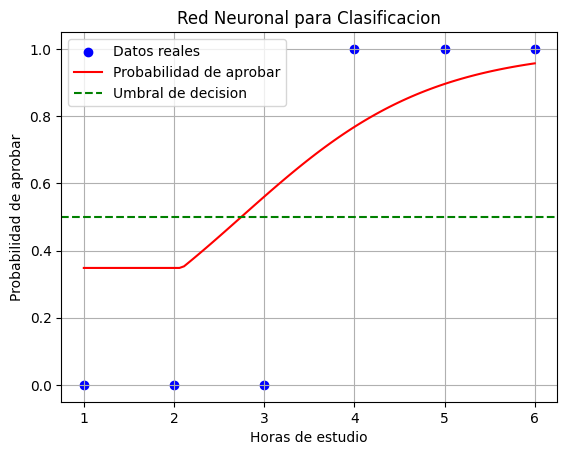

In [ ]:
#Visualizacion
X_rango = np.linspace(1, 6, 100).reshape(-1, 1)
y_prob = modelo.predict_proba(X_rango) [:, 1] #probabilidad de aprobar

plt.scatter(X,y, color='blue', label='Datos reales')
plt.plot(X_rango, y_prob, color='red', label='Probabilidad de aprobar')
plt.axhline(0.5, color='green', linestyle='--', label='Umbral de decision')
plt.xlabel('Horas de estudio')
plt.ylabel('Probabilidad de aprobar')
plt.title('Red Neuronal para Clasificacion')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
#EJEMPLO 03
import numpy as np
#Datos sinteticos: [horas_estudio, horas _sueño]
X = np.array ([
    [2, 8], # Aprobó
    [3, 7], # Aprobó
    [1, 5], # No Aprobó
    [4, 9], # Aprobó
    [2, 4], # No Aprobó
    [5, 8]  # Aprobó
])
#Etiquetas (0: No aprobo, 1: Si aprobo)
y = np.array([1, 1, 0, 1, 0, 1])

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Crear el modelo
model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)), #Capa oculta
    Dense(1, activation='sigmoid') #Capa de salida (clasificacion binaria)
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.fit(X, y, epochs=100, verbose=0) # Entrena en silencio (sin output)

In [5]:
# Nuevos datos para predecir: [horas_estudio, horas_sueño]
nuevos_datos = np.array([
    [3, 6],  # ¿Aprobo?
    [1, 3],  # ¿Aprobo?
])

predicciones = model.predict(nuevos_datos)

print('Probabilidades de aprobar:', predicciones.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Probabilidades de aprobar: [0.83102924 0.5512018 ]
